In [1]:
# !unzip real_or_drawing

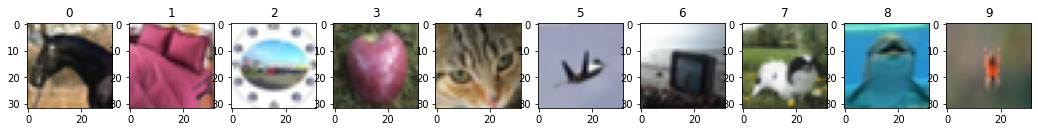

In [2]:
import matplotlib.pyplot as plt
import os
titles = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize = (18,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    fig = plt.imshow(plt.imread(f'./real_or_drawing/train_data/{i}/{500*i + 1}.bmp'))
    plt.title(titles[i])

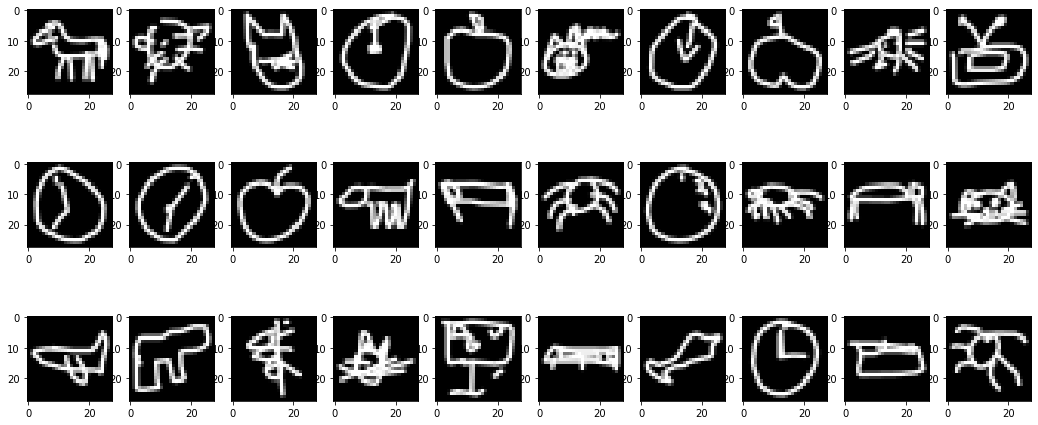

In [3]:
plt.figure(figsize = (18,8))
for i in range(30):
    plt.subplot(3,10,i+1)
    fig = plt.imshow(plt.imread(f'./real_or_drawing/test_data/0/' + str(i).rjust(5,'0') + '.bmp'))

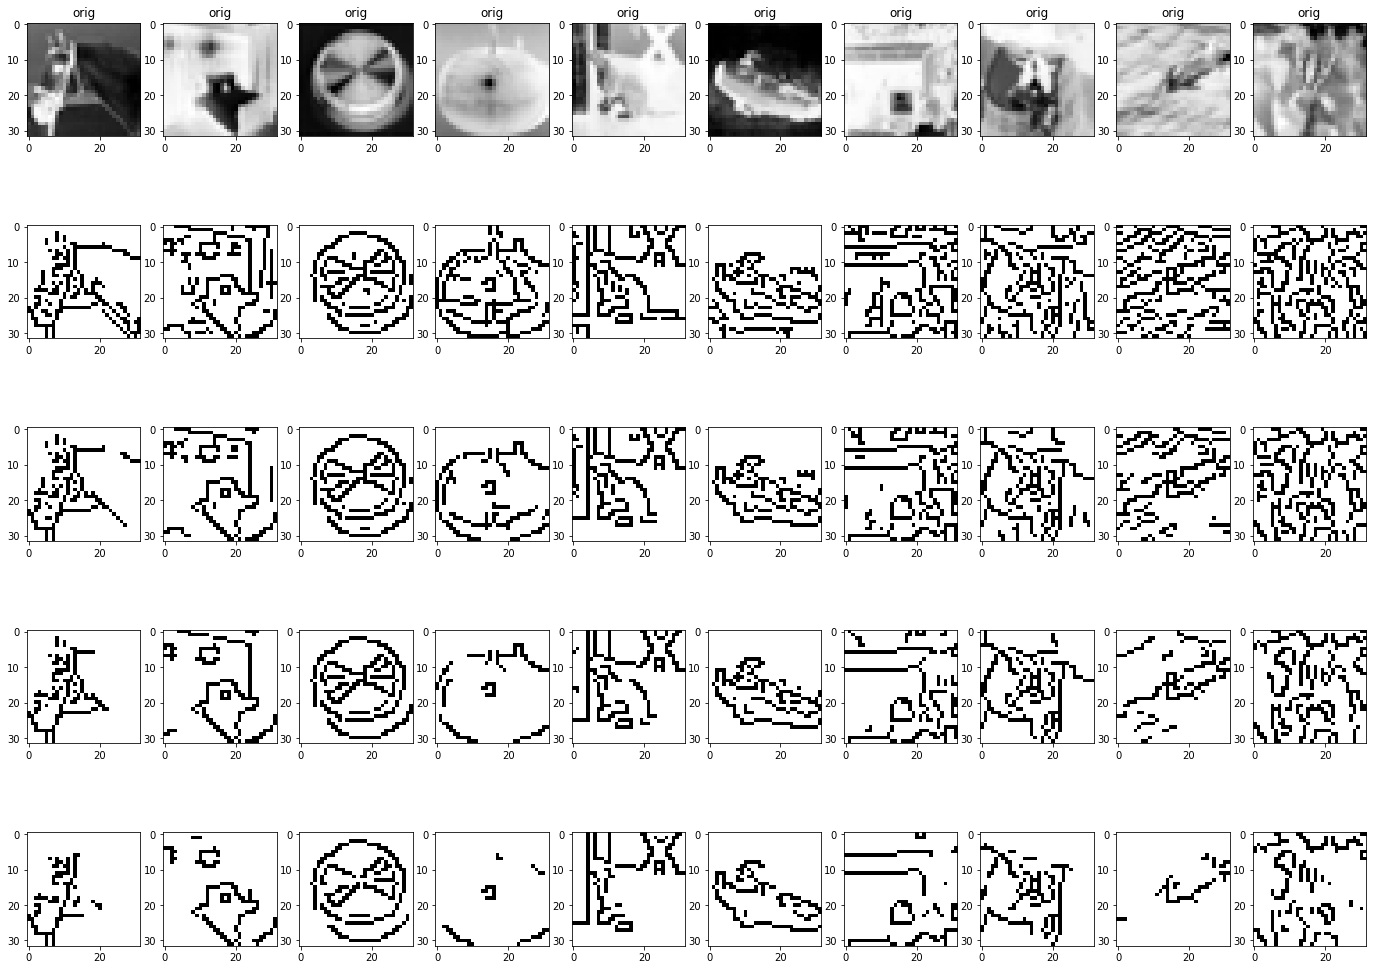

In [4]:
import cv2
plt.figure(figsize = (24,18))
lbd = [50,100,150,250]
ubd = [100,150,200,300]
for i in range(10):
    orig = plt.imread(f'./real_or_drawing/train_data/{i}/{500*i + 19}.bmp')
    gray = cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)
    for j in range(5):
        if j == 0:
            plt.subplot(5,10,1 + i + j*10)
            plt.imshow(gray,cmap = 'Greys')
            plt.title('orig')
            # print(j)
        else:
            plt.subplot(5,10,1 + i + j*10)
            plt.imshow(cv2.Canny(gray,lbd[j-1],ubd[j-1]),cmap = 'Greys')
            # print(j)

In [5]:
import numpy as np
import random
PATH = './real_or_drawing/train_data/'
os.mkdir('./raw/')
RAW_PATH = './raw/'
LIST = sorted(os.listdir(PATH + str(0)))
X = np.zeros((len(LIST)*10,32,32,1),dtype = np.uint8)
Y = np.zeros((len(LIST)*10),dtype = np.int64)
for i in range(10):
    LIST = sorted(os.listdir(PATH + str(i)))
    random.shuffle(LIST)
    for j,DATA in enumerate(LIST):
        orig = plt.imread(PATH + f'{i}/' + DATA)
        gray = cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)
        X[500*i + j,:,:,0] = cv2.Canny(gray,100,150)
        Y[500*i + j] = int(i)
        if j % 100 == 0:
            print(f'category {i}, completed {j}')

category 0, completed 0
category 0, completed 100
category 0, completed 200
category 0, completed 300
category 0, completed 400
category 1, completed 0
category 1, completed 100
category 1, completed 200
category 1, completed 300
category 1, completed 400
category 2, completed 0
category 2, completed 100
category 2, completed 200
category 2, completed 300
category 2, completed 400
category 3, completed 0
category 3, completed 100
category 3, completed 200
category 3, completed 300
category 3, completed 400
category 4, completed 0
category 4, completed 100
category 4, completed 200
category 4, completed 300
category 4, completed 400
category 5, completed 0
category 5, completed 100
category 5, completed 200
category 5, completed 300
category 5, completed 400
category 6, completed 0
category 6, completed 100
category 6, completed 200
category 6, completed 300
category 6, completed 400
category 7, completed 0
category 7, completed 100
category 7, completed 200
category 7, completed 300
ca

In [6]:
PATH = './real_or_drawing/test_data/'
RAW_PATH = './raw/'
LIST = sorted(os.listdir(PATH + str(0)))
random.shuffle(LIST)
XX = np.zeros((len(LIST),32,32,1),dtype = np.uint8)
for j,DATA in enumerate(LIST):
    orig = plt.imread(PATH + str(0) + '/' + DATA)
    gray = cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)
    XX[j,:,:,0] = cv2.resize(gray,(32,32))
    if j % 1000 == 0:
        print(f'completed: {j}/{len(LIST)}')

completed: 0/100000
completed: 1000/100000
completed: 2000/100000
completed: 3000/100000
completed: 4000/100000
completed: 5000/100000
completed: 6000/100000
completed: 7000/100000
completed: 8000/100000
completed: 9000/100000
completed: 10000/100000
completed: 11000/100000
completed: 12000/100000
completed: 13000/100000
completed: 14000/100000
completed: 15000/100000
completed: 16000/100000
completed: 17000/100000
completed: 18000/100000
completed: 19000/100000
completed: 20000/100000
completed: 21000/100000
completed: 22000/100000
completed: 23000/100000
completed: 24000/100000
completed: 25000/100000
completed: 26000/100000
completed: 27000/100000
completed: 28000/100000
completed: 29000/100000
completed: 30000/100000
completed: 31000/100000
completed: 32000/100000
completed: 33000/100000
completed: 34000/100000
completed: 35000/100000
completed: 36000/100000
completed: 37000/100000
completed: 38000/100000
completed: 39000/100000
completed: 40000/100000
completed: 41000/100000
compl

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset

In [8]:
transform_in = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.Lambda(lambda x:cv2.Canny(np.array(x),170,300)),
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

transform_out = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.Resize((32,32)),
    # transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

class ImgDataSetter(Dataset):
    def __init__(self,x,y = None,transform = None):
        self.x = x
        self.y = y
        if y is not None:
            self.y = y
        self.transform = transform
    def __len__(self):
        return len(self.x)
    def __getitem__(self,index):
        X = self.x[index]
        if self.transform is not None:
            X = self.transform(X)
        if self.y is not None:
            Y = self.y[index]
            return X,Y
        else:
            return X

source_dataset = ImgDataSetter(X,Y,transform = transform_in)
target_dataset = ImgDataSetter(XX,transform = transform_out)
source_dataloader = DataLoader(source_dataset,batch_size = 32,shuffle = True)
target_dataloader = DataLoader(target_dataset,batch_size = 32,shuffle = True)
test_dataloader = DataLoader(target_dataset,batch_size = 128,shuffle = False)

In [9]:
class Extractor(nn.Module):
    def __init__(self):
        super(Extractor,self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1,64,3,1,1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2,0),
        
            nn.Conv2d(64,128,3,1,1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2,0),
        
            nn.Conv2d(128,256,3,1,1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2,0),
        
            nn.Conv2d(256,512,3,1,1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2,0),
        
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(),
            nn.MaxPool2d(2,2,0)
        )
        
    def forward(self,x):
        out = self.cnn(x)
        out = out.view(out.size()[0],-1) # flatten
        return out

In [10]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(512,512),
            nn.LeakyReLU(),
            
            nn.Linear(512,1024),
            nn.LeakyReLU(),
            
            nn.Linear(1024,10)
        )
    
    def forward(self,h):
        y = self.layer(h)
        return y

In [11]:
class DomainClassifier(nn.Module):
    def __init__(self):
        super(DomainClassifier,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(512,512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            
            nn.Linear(512,512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            
            nn.Linear(512,512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            
            nn.Linear(512,1)
        )
        
    def forward(self,h):
        y = self.layer(h)
        return y

In [12]:
extractor = Extractor().cuda()
classifier = Classifier().cuda()
dclassifier = DomainClassifier().cuda()

classifier_loss = nn.CrossEntropyLoss()
dclassifier_loss = nn.BCEWithLogitsLoss()

optimizer_e = optim.AdamW(extractor.parameters())
optimizer_c = optim.AdamW(classifier.parameters())
optimizer_d = optim.AdamW(dclassifier.parameters())

In [13]:
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode = 'max',factor = 0.5,patience = 20,verbose = True,threshold = 1e-4,threshold_mode = 'rel',cooldown = 0,min_lr = 0,eps = 1e-8)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max = 10,eta_min=0, last_epoch=-1)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size = 400,gamma = 0.5,last_epoch=-1,verbose = False)
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr = 0.01,total_steps = 1550,verbose = True)
# scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer,base_lr = 3e-4,max_lr = 3e-3,mode = 'exp_range',gamma = 0.98,step_size_up = 10,cycle_momentum = False)
loss = nn.CrossEntropyLoss()
lamb = 0.1
epoch_num = 100

d_loss_history = []
f_loss_history = []
acc_history = []
import time

for epoch in range(epoch_num):
    epoch_start_time = time.time()
    d_loss,f_loss,hit,total = 0.0,0.0,0.0,0.0
    for i,((x,y),(ksi)) in enumerate(zip(source_dataloader,target_dataloader)):
        x,y,ksi = x.cuda(),y.cuda(),ksi.cuda()
        mixed_x = torch.cat([x,ksi],dim = 0)
        domain_y = torch.zeros([x.shape[0] + ksi.shape[0],1]).cuda()
        domain_y[:x.shape[0]] = 1
        # train dclassifier
        feature = extractor(mixed_x)
        domain_logits = dclassifier(feature.detach())
        loss = dclassifier_loss(domain_logits,domain_y)
        d_loss += loss.item()
        loss.backward()
        optimizer_d.step()
        
        # train extractor & dclassifier
        class_logits = classifier(feature[:x.shape[0]])
        domain_logits = dclassifier(feature)
        loss = classifier_loss(class_logits,y) - lamb * dclassifier_loss(domain_logits,domain_y)
        f_loss += loss.item()
        loss.backward()
        optimizer_e.step()
        optimizer_c.step()
        
        optimizer_d.zero_grad()
        optimizer_e.zero_grad()
        optimizer_c.zero_grad()
        
        hit += torch.sum(torch.argmax(class_logits,dim = 1) == y).item()
        total += x.shape[0]
    print('[%03d/%03d], time used: %2.4f sec(s), d_loss|f_loss|acc: %3.6f|%3.6f|%3.6f' % (epoch+1,epoch_num,time.time()-epoch_start_time,d_loss/(epoch+1),f_loss/(epoch+1),hit/total))
    d_loss_history.append(d_loss)
    f_loss_history.append(f_loss)
    acc_history.append(hit/total)

[001/100], time used: 56.1749 sec(s), d_loss|f_loss|acc: 96.116505|316.322587|0.227600
[002/100], time used: 47.6975 sec(s), d_loss|f_loss|acc: 39.608499|138.411886|0.334600
[003/100], time used: 43.9705 sec(s), d_loss|f_loss|acc: 33.778077|84.937122|0.396000
[004/100], time used: 44.3355 sec(s), d_loss|f_loss|acc: 20.854338|62.054153|0.412200
[005/100], time used: 43.9705 sec(s), d_loss|f_loss|acc: 17.383216|47.185679|0.440200
[006/100], time used: 46.8269 sec(s), d_loss|f_loss|acc: 13.524301|38.928977|0.443200
[007/100], time used: 45.0745 sec(s), d_loss|f_loss|acc: 12.582041|32.529374|0.462800
[008/100], time used: 45.0546 sec(s), d_loss|f_loss|acc: 10.957471|27.029256|0.485600
[009/100], time used: 44.2777 sec(s), d_loss|f_loss|acc: 10.425903|23.467565|0.499800
[010/100], time used: 44.3465 sec(s), d_loss|f_loss|acc: 8.390508|20.853164|0.508600
[011/100], time used: 44.2098 sec(s), d_loss|f_loss|acc: 7.974594|18.395426|0.525400
[012/100], time used: 44.1450 sec(s), d_loss|f_loss|ac

[099/100], time used: 44.6437 sec(s), d_loss|f_loss|acc: 0.549452|0.107574|0.966800
[100/100], time used: 46.5605 sec(s), d_loss|f_loss|acc: 0.565045|0.109247|0.965800


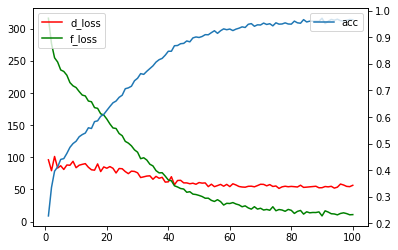

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.linspace(1,epoch_num,epoch_num)
x = x.transpose()
ax1.plot(x,d_loss_history[-epoch_num:],label = 'd_loss',color = 'red')
ax1.plot(x,f_loss_history[-epoch_num:],label = 'f_loss',color = 'green')
plt.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(x,acc_history[-epoch_num:],label = 'acc')
plt.legend(loc='upper right')
plt.show()

In [19]:
torch.save(extractor.state_dict(),f'extractor_model.bin')
torch.save(classifier.state_dict(),'classifier_model.bin')

In [23]:
results = []
classifier.eval()
extractor.eval()
for i,KSI in enumerate(test_dataloader):
    KSI = KSI.cuda()
    class_logits = classifier(extractor(KSI))
    result = torch.argmax(class_logits,dim = 1).cpu().detach().numpy()
    results.append(result)
    if i % 100 == 0:
        print(f'complete: {i}/{len(test_dataloader)}')
    
import pandas as pd
results = np.concatenate(results)
df = pd.DataFrame({'id':np.arange(0,len(results)),'label':results})
df.to_csv('DaNN_scrawl_descrimination.csv')

complete: 0/782
complete: 100/782
complete: 200/782
complete: 300/782
complete: 400/782
complete: 500/782
complete: 600/782
complete: 700/782
